# Random Walk’s Data Science Assessment
 

##### We use the install and import the nessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


##### We first see a preview of the given dataset

In [2]:
# The data is stored in the variable dataframe
dataframe = pd.read_csv('books.csv')
print(dataframe)

     book_id  goodreads_book_id  best_book_id   work_id  books_count  \
0         15              48855         48855   3532896          710   
1         40              19501         19501   3352398          185   
2         81               7445          7445   2944133           92   
3         82               1845          1845   3284484          108   
4         87               1617          1617    265616          109   
..       ...                ...           ...       ...          ...   
394     9788           23399022      23399022  42955411           21   
395     9847           20685373      20685373  40000267           18   
396     9887             503248        503248    491309           21   
397     9960             127970        127970   1066433           26   
398     9968             554674        554674    548132           34   

           isbn        isbn13  \
0     553296981  9.780553e+12   
1     143038419  9.780143e+12   
2    074324754X  9.780743e+12   
3  

### Q1: How many rows and columns are there in books.csv dataset?
    ANS:
    There are 399 rows in the given dataset.
    There are 24 columns in the given dataset.

In [3]:
#shape returns the number of rows and columns
n_rows,n_columns=dataframe.shape
print("The number of Rows in the given dataset:",n_rows)
print("The number of Columns in the given dataset:",n_columns)

The number of Rows in the given dataset: 399
The number of Columns in the given dataset: 24


In [4]:
columns_names=dataframe.columns.tolist()
print(columns_names)

['book_id', 'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url', 'NonEnglish']


### Q2: How many books do not have an original title?
    Ans:
    The number of books that do not have an original title 36


In [5]:
# nunique is used to find the count of unique values in that column
n_unique_orgtitle=dataframe['original_title'].nunique()
print("The number of unique values in original_title column",n_unique_orgtitle)
# .isnull().sum() is used to count the number of null values in the column
n_null_orgtitle = dataframe['original_title'].isnull().sum()
print("The number of books that do not have an original title",n_null_orgtitle)

The number of unique values in original_title column 363
The number of books that do not have an original title 36


### Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.
    Ans:
    The number of unique books present in dataset are : 363 books
    

In [6]:

# dropna() is used to drop the rows that have null values
clean_dataframe = dataframe.dropna(subset=['original_title'])
n_unique_bookid=clean_dataframe['book_id'].nunique()
print("The number of unique books, based on the book_id column are: ",n_unique_bookid)
n_null_bookid = clean_dataframe['book_id'].isnull().sum()
print("The number of unique values in book_id column",n_null_bookid)


The number of unique books, based on the book_id column are:  363
The number of unique values in book_id column 0


### Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?
    Ans:
    The average rating of all the books in the dataset is: 3.9837844611528817

We find the average rating of all the books using the mean() function on the 'average_rating' column in the given dataset.

In [7]:
# We use mean() to find the average of the column

avg_rating = dataframe['average_rating'].mean()
print("The average rating of all the books in the dataset is:",avg_rating)
avg_rating = clean_dataframe['average_rating'].mean()
print("The average rating of all the unique books in the dataset is:",avg_rating)


The average rating of all the books in the dataset is: 3.9837844611528817
The average rating of all the unique books in the dataset is: 3.987079889807162


### Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.
    Ans: 
    The number of books published in the year 2000: 8

    

In [11]:
#We select all the books published in the year 2000
book_pub_2000 = dataframe[dataframe['original_publication_year'] == 2000]
# We use len() to find the number of books in the variable book_pub_2000
n_book_pub_2000=len(book_pub_2000)

print("The number of books published in the year 2000:",n_book_pub_2000)
c_book_pub_2000 = clean_dataframe[clean_dataframe['original_publication_year'] == 2000]
c_n_book_pub_2000=len(c_book_pub_2000)
print("The number of unqiue books published in the year 2000(obtained after removing the rows with Null values):",c_n_book_pub_2000)

The number of books published in the year 2000: 8
The number of unqiue books published in the year 2000(obtained after removing the rows with Null values): 7


### Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.
    Ans:
    The book with the maximum number of ratings is: The Diary of a Young Girl


In [9]:
# idmax() returns the index value of the largest rating
max_rating_book_rn = dataframe['work_ratings_count'].idxmax()

max_rating_book = dataframe.at[max_rating_book_rn, 'title']

print("The book with the maximum number of ratings is:", max_rating_book)



The book with the maximum number of ratings is: The Diary of a Young Girl


### Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

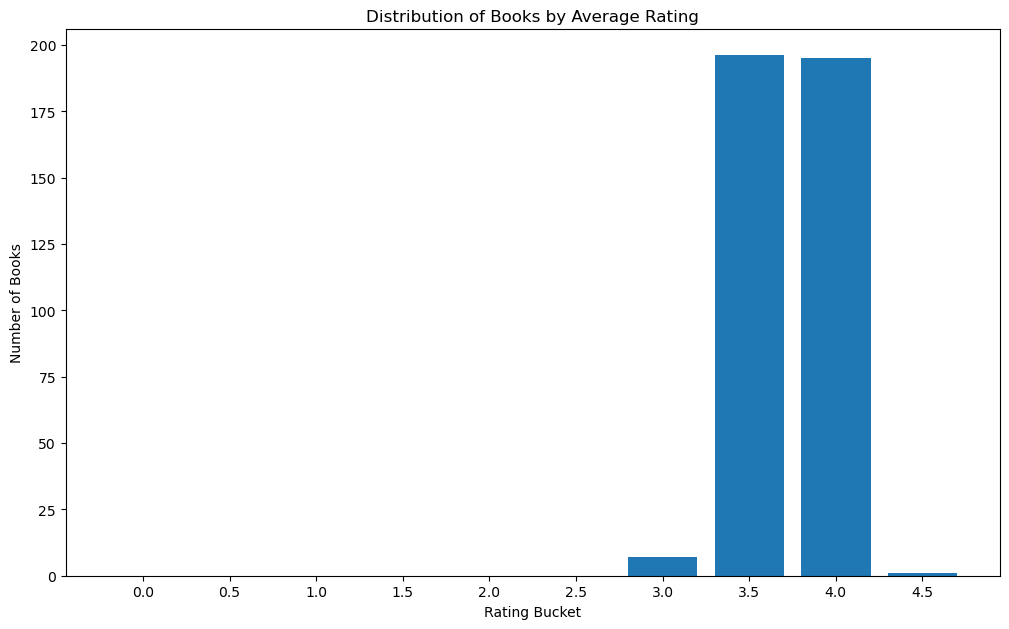

In [10]:
dataframe
bucket = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
# We first perform decimal rounding on average_rating
dataframe['bucket'] = pd.cut(dataframe['average_rating'], bucket, labels=bucket[:-1])
# We count how many values fall in each bucket
n_books_per_bucket = dataframe['bucket'].value_counts()

# We plot our findings 
plt.figure(figsize=(10, 6))
plt.xticks(n_books_per_bucket.index, rotation=0, ha="center")
plt.bar(
    n_books_per_bucket.index, 
    n_books_per_bucket.values, 
    tick_label=n_books_per_bucket.index,
    width=0.4)
plt.tight_layout()
plt.xlabel("Rating Bucket")
plt.ylabel("Number of Books")
plt.title("Distribution of Books by Average Rating")
plt.show()